In [1]:
import matplotlib.pyplot as plt
import torch

from ptvi.algos.fivo import (
    simulate_FIVO, StochasticVolatilityModel, AR1Proposal)

In [2]:
torch.manual_seed(123)
T = 200
p_true = StochasticVolatilityModel(a=torch.tensor(1.), b=torch.tensor(0.), c=torch.tensor(0.95))
print(p_true)
x, z_true = p_true.simulate(T)

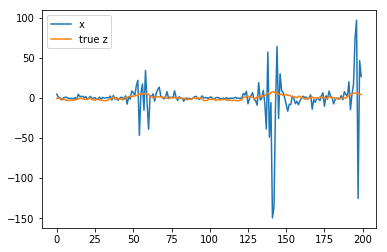

In [3]:
plt.plot(x.numpy(), label='x')
plt.plot(z_true.numpy(), label='true z')
plt.legend();

In [4]:
p = StochasticVolatilityModel(a=torch.tensor(1.), b=torch.tensor(0.), c=torch.tensor(0.95))
print(p)
q = AR1Proposal(μ=0., ρ=0.5)
print(q)
log_phatN, Z, resampled = simulate_FIVO(x, p, q, N=10, resample=True)

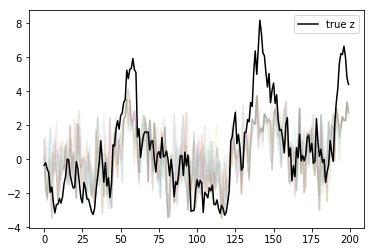

In [5]:
plt.plot(Z.numpy(), alpha=0.1);
plt.plot(z_true.numpy(), color='black', label='true z')
plt.legend();

In [8]:
# stochastic optimization
θ = torch.zeros((3,), requires_grad=True)
φ = torch.zeros((2,), requires_grad=True)
opt = torch.optim.Adam([φ])
for i in range(2**14):
    opt.zero_grad()
    #p = StochasticVolatilityModel(a=θ[0], b=θ[1], c=θ[2])
    p = StochasticVolatilityModel(a=torch.tensor(1.), b=torch.tensor(0.), c=torch.tensor(0.95))
    q = AR1Proposal(μ=φ[0], ρ=φ[1])
    log_phatN, Z, resampled = simulate_FIVO(x, p, q, N=10, resample=True,
                                            rewrite_history=True)
    loss = log_phatN
    loss.backward()
    if not i&(i-1):
        print(f'{i:8d}. FIVO = {log_phatN.data:6.2f}')
    opt.step()

print(f'φ = {φ}')
print(f'θ = {θ}')

       0. FIVO = -2122.19
       1. FIVO = -2055.88
       2. FIVO = -2056.03
       4. FIVO = -1545.77
       8. FIVO = -1977.52
      16. FIVO = -1843.84
      32. FIVO = -2516.88
      64. FIVO = -1810.42
     128. FIVO = -1355.87
     256. FIVO = -1130.59
     512. FIVO = -726.70
    1024. FIVO = -558.04
    2048. FIVO = -520.29
    4096. FIVO = -518.17
    8192. FIVO = -485.63
φ = tensor([0.2153, 0.8317], requires_grad=True)
θ = tensor([0., 0., 0.], requires_grad=True)
